<span style="color:black;font-weight:700;font-size:32px"> 
               Предсказание цены автомобиля
    
</span>

<span style="color:black;font-weight:700;font-size:22px"> 
              Описание проекта
</span>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля.\
Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.



<span style="color:black;font-weight:700;font-size:18px"> 
              Описание данных
</span>


Данные находятся в файле /datasets/autos.csv. 

Признаки
- **DateCrawled** — дата скачивания анкеты из базы
- **VehicleType** — тип автомобильного кузова
- **RegistrationYear** — год регистрации автомобиля
- **Gearbox** — тип коробки передач
- **Power** — мощность (л. с.)
- **Model** — модель автомобиля
- **Kilometer** — пробег (км)
- **RegistrationMonth** — месяц регистрации автомобиля
- **FuelType** — тип топлива
- **Brand** — марка автомобиля
- **Repaired** — была машина в ремонте или нет
- **DateCreated** — дата создания анкеты
- **NumberOfPictures** — количество фотографий автомобиля
- **PostalCode** — почтовый индекс владельца анкеты (пользователя)
- **LastSeen** — дата последней активности пользователя


**Целевой признак**
  **Price — цена (евро)**


<span style="color:black;font-weight:700;font-size:22px"> 
              План работы
 </span>
 
1) Загрузка данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Объединение датасетов

5) Корреляционный анализ

6) Построение пайплайнов моделей машинного обучения (KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC().)

7) Анализ важности признаков. 

8) Сегментация покупателей.

9) Общий вывод

# Загрузка данных

In [2]:
! pip install phik -q

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [4]:
data = pd.read_csv('C:/Users/Иван/test/13Sprint/autos.csv', parse_dates=['DateCrawled', 'DateCreated','LastSeen'], 
                   date_parser=pd.to_datetime)
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

# Предобработка данных


Проведем предварительную предобработку данных,  в ходе которой обработаем пропуски, дубликаты(явные, неявные), выбросы

In [6]:
nan_df = pd.DataFrame(data.isnull().mean() * 100, columns=['nan_perc'])
nan_df

,nan_perc
DateCrawled,0.000000
Price,0.000000
VehicleType,10.579368
RegistrationYear,0.000000
Gearbox,5.596709
Power,0.000000
Model,5.560588
Kilometer,0.000000
RegistrationMonth,0.000000
FuelType,9.282697


In [7]:
to_fill_cols = nan_df[nan_df['nan_perc'] > 0].index.to_list()
for col in to_fill_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [8]:
data.isnull().mean() * 100

DateCrawled          0.0
Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Kilometer            0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
Repaired             0.0
DateCreated          0.0
NumberOfPictures     0.0
PostalCode           0.0
LastSeen             0.0
dtype: float64

Так как пропуски присутствовали в категориальных признаках, обработали их модой по столбцу


In [9]:
data.duplicated().sum()

5

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

Проверим признаки на неявные дубликаты

In [12]:
object_columns = data.select_dtypes(include='object').columns.to_list()

In [13]:
for col in object_columns:
    print(col)
    print(data[col].value_counts())
    print()

VehicleType
sedan          128946
small           79830
wagon           65165
bus             28775
convertible     20203
coupe           16161
suv             11996
other            3288
Name: VehicleType, dtype: int64

Gearbox
manual    288081
auto       66283
Name: Gearbox, dtype: int64

Model
golf                  48937
other                 24420
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64

FuelType
petrol      249244
gasoline     98718
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Brand
volkswagen        77012
opel              39931
bmw               36914
mercedes_benz     32044
audi              29455
ford              25179
renault           17927
peugeot 

Неявные дубликаты в датасет отсутствуют

In [14]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_cols

['Price',
 'RegistrationYear',
 'Power',
 'Kilometer',
 'RegistrationMonth',
 'NumberOfPictures',
 'PostalCode']

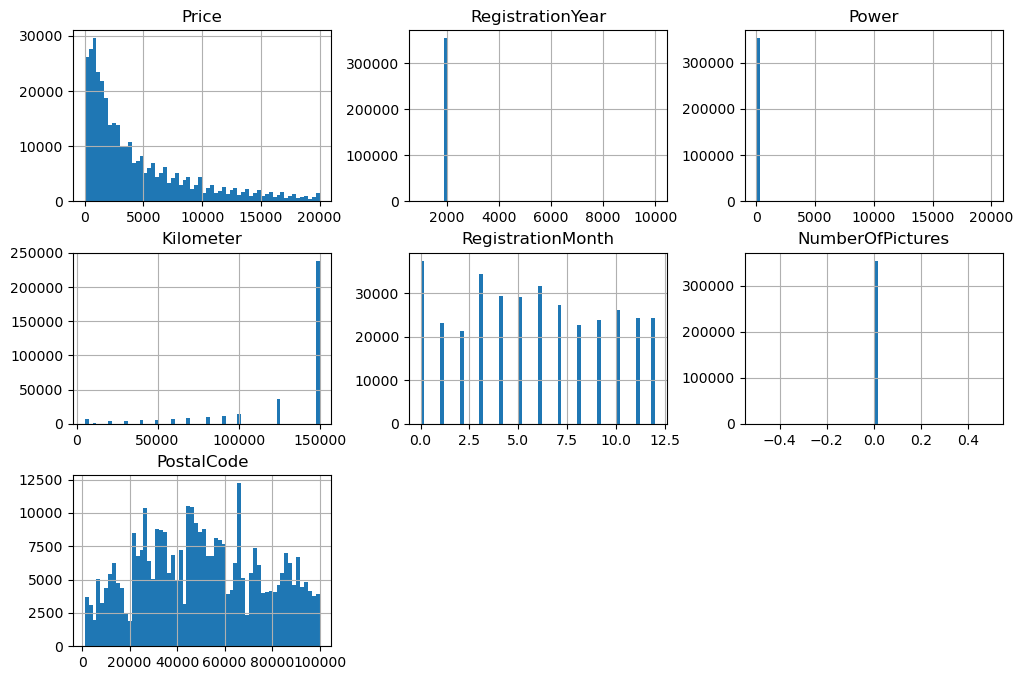

In [15]:
data[num_cols].hist(bins=60, figsize=(12,8));

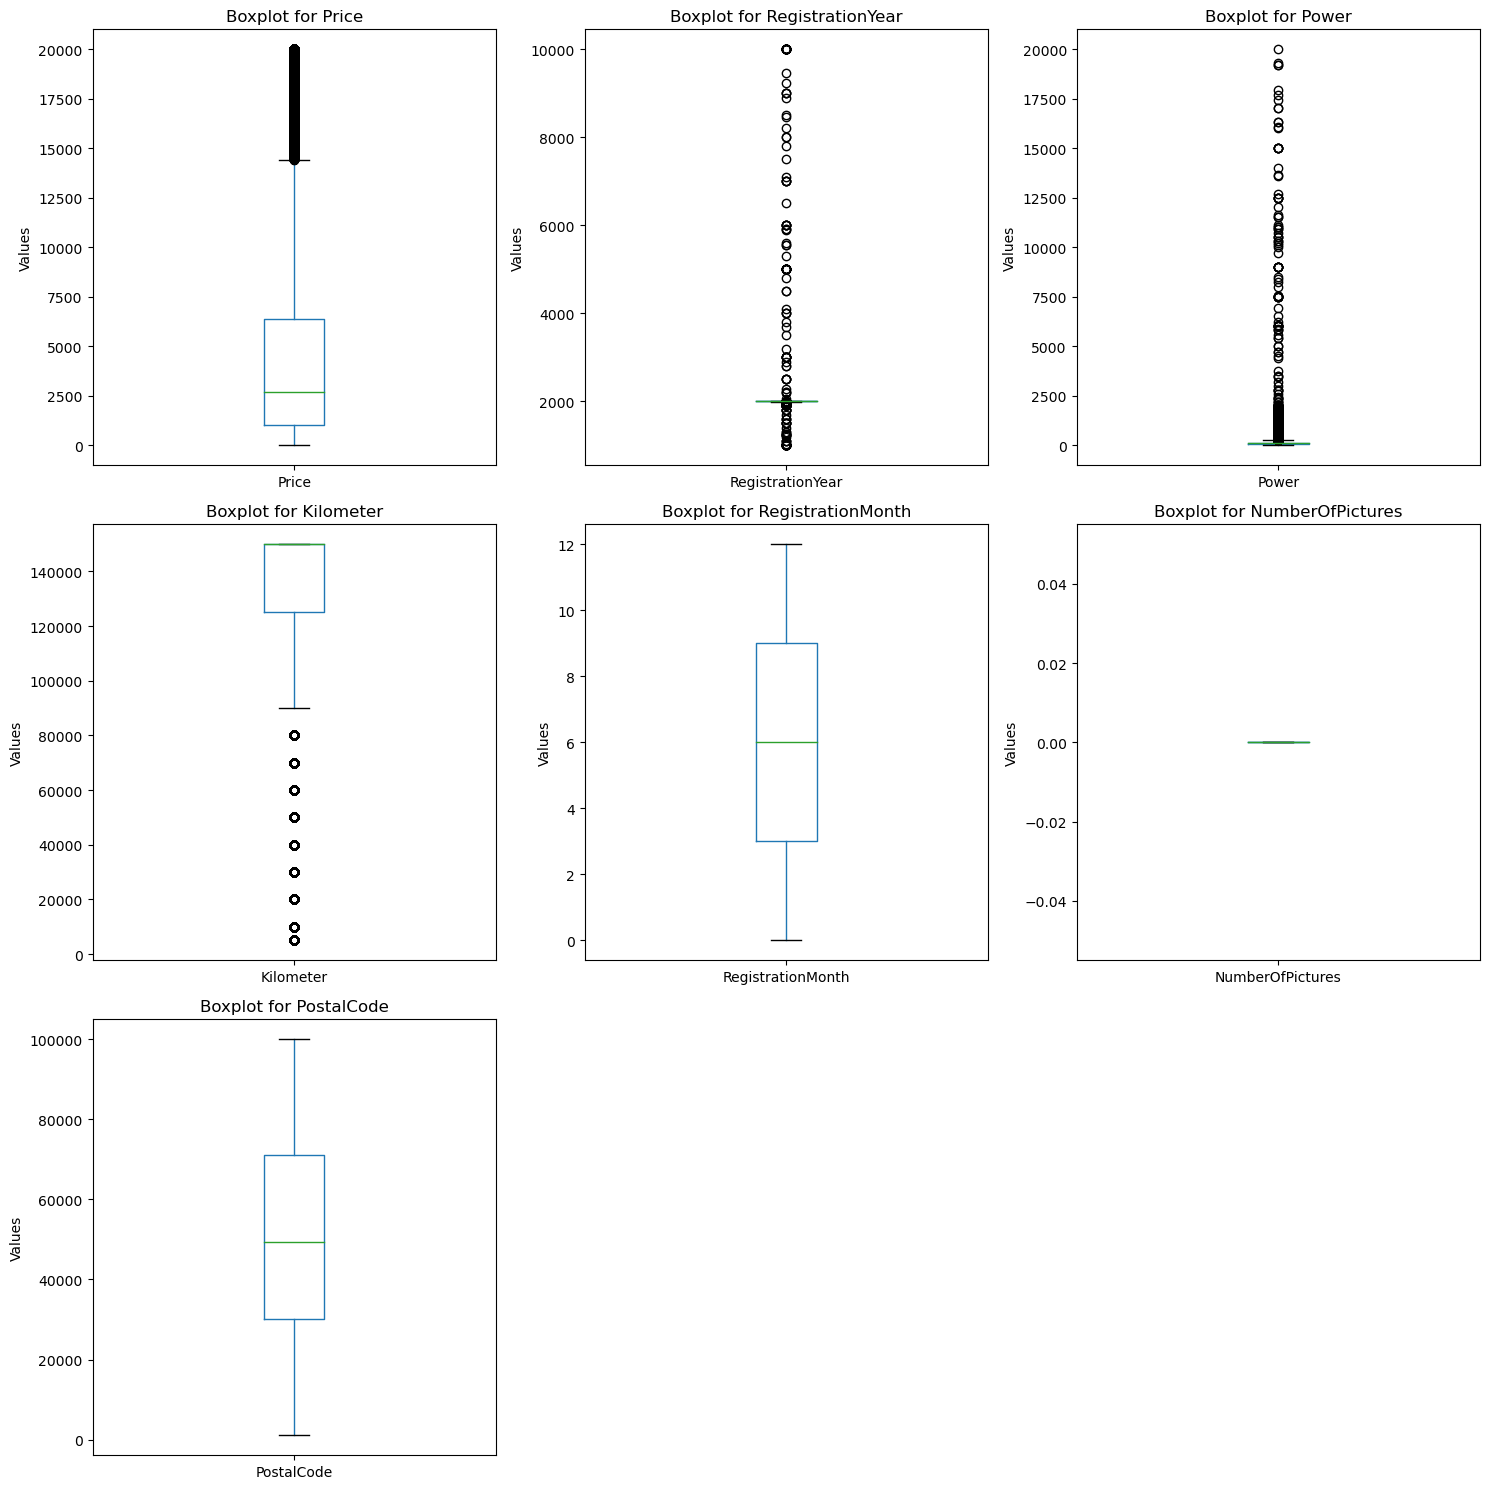

In [16]:
num_plots = len(num_cols)
num_columns = 3
num_rows = -(-num_plots // num_columns)  

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

for i, column in enumerate(num_cols):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    data.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel('Values')
    ax.grid(False)

for i in range(num_plots, num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Обработаем выбросы на уровне 0,01 и 0.99 квантилей

In [17]:
def handle_outliers_all_columns(dataframe, low_quantile=None, high_quantile=None):
    """
    Параметры:
    - dataframe: pandas DataFrame, входной датасет
    - lower_bound: float, нижняя граница для обработки выбросов (если None, не применяется)
    - upper_bound: float, верхняя граница для обработки выбросов 
    """
    df = dataframe.copy()

    numeric_columns = num_cols
    
    size_of_dataset_before_handling = df.shape[0]
    for column_name in numeric_columns:
        lower_bound = df[column_name].quantile(low_quantile)
        higher_bound = df[column_name].quantile(high_quantile)
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= higher_bound)]
        
        
    size_of_dataset_after_handling = df.shape[0]
    print(f"Процент удаленных значений {(1- (size_of_dataset_after_handling / size_of_dataset_before_handling)) * 100}")
    
    
    return df


In [18]:
data = handle_outliers_all_columns(dataframe=data, low_quantile=0.01, high_quantile=0.99)

Процент удаленных значений 4.825546613087106


В результате обработки выбросов удалено не больше не 10% значений датасета


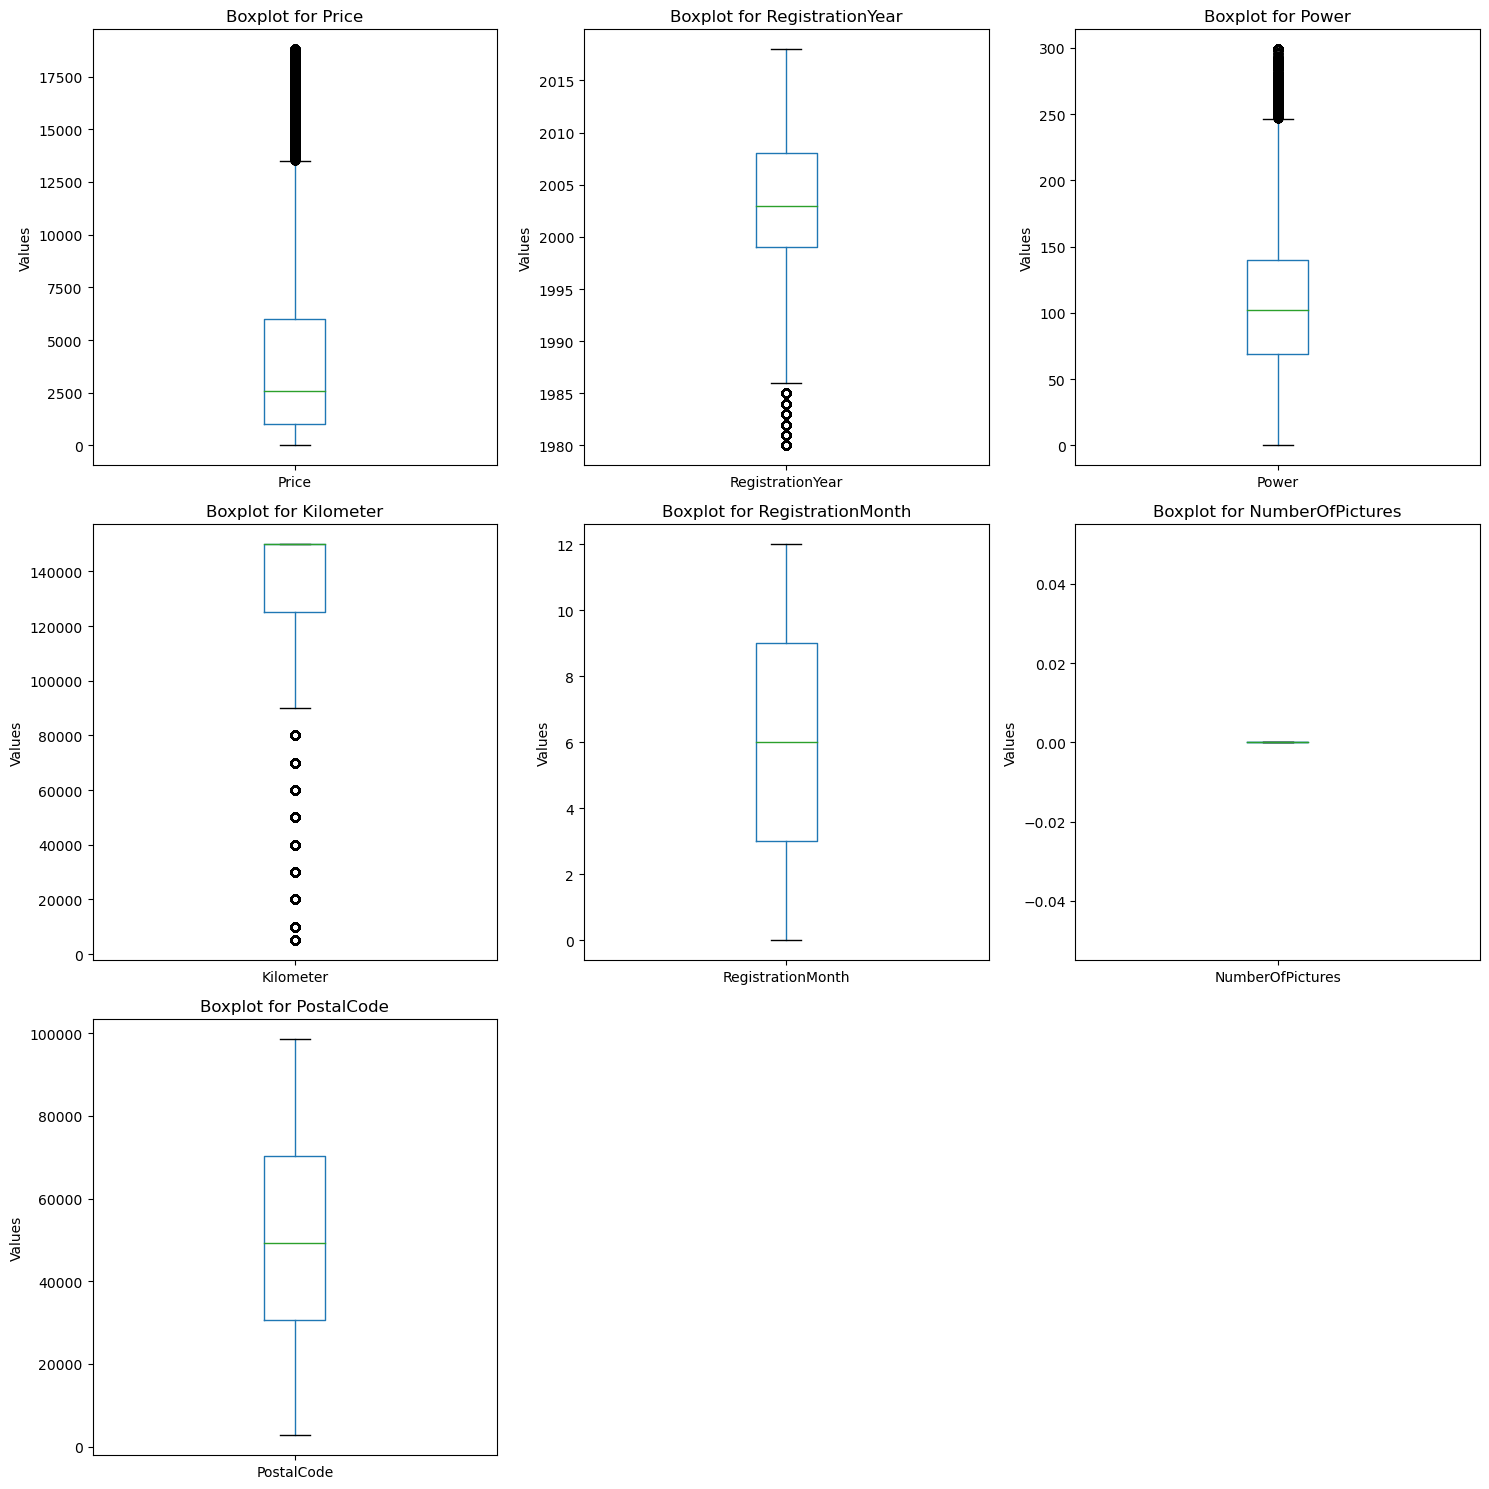

In [19]:
num_plots = len(num_cols)
num_columns = 3
num_rows = -(-num_plots // num_columns)  

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

for i, column in enumerate(num_cols):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    data.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel('Values')
    ax.grid(False)

for i in range(num_plots, num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Можно заметить, что столбец NumberOfPictures содержит только нулевые значения, соответственно, он будет неинформативным для нас и его можно удалить

In [20]:
data = data.drop(columns=['NumberOfPictures'])

In [21]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,60437,2016-04-06 10:17:21


Также удалим неинформативные для нас следующие признаки :\
DateCrawled — дата скачивания анкеты из базы\
LastSeen — дата последней активности пользователя\
DateCreated — дата создания анкеты

In [22]:
data = data.drop(columns=['DateCrawled', 'LastSeen', 'DateCreated'])

In [23]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,PostalCode
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no,70435
1,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes,66954
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,90480
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437


<span style="color:black;font-weight:700;font-size:18px"> 
       Вывод
</span>

В результате предобработки данных были обработаны пропуски, выбросы и дубликаты

# Исследовательский анализ данных

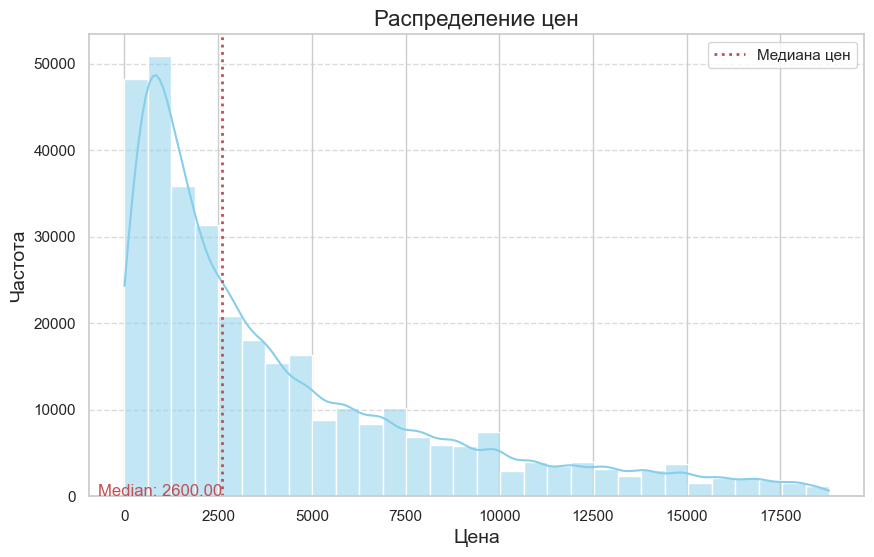

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data['Price'], kde=True, color='skyblue', bins=30)

median_price = data['Price'].median()
plt.axvline(x=median_price, color='r', linestyle=':', linewidth=2, label='Медиана цен')

plt.text(median_price, 30, f'Median: {median_price:.2f}', color='r', fontsize=12, ha='right')
plt.title('Распределение цен', fontsize=16)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Проведем исследовательский анализ и посмотрим какие признаки больше всего влияют на целевой признак цены

Text(0.5, 1.0, 'Средние цена автомобилей разных брендов')

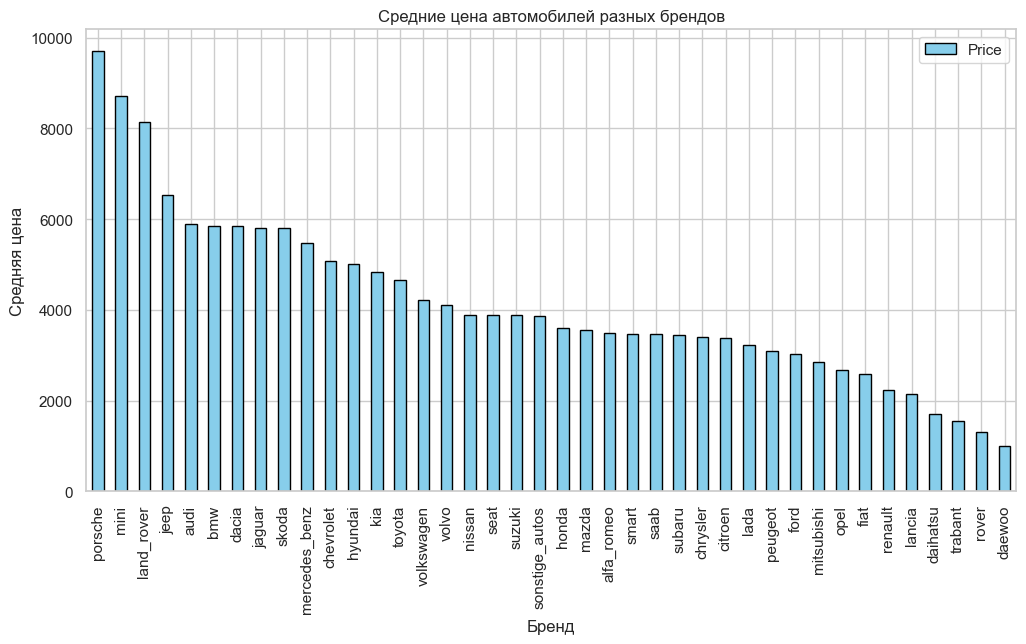

In [25]:
data.pivot_table(index=['Brand'], 
                 values=['Price'], 
                 aggfunc=np.mean)\
    .sort_values(by='Price',ascending=False)\
    .plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.title('Средние цена автомобилей разных брендов')

Самые дорогие машины брендов Porsche, Mini, Land Rover, Jeep, Audi, BMW

Text(0.5, 1.0, 'Средние цена автомобилей c разными типами коробки передач')

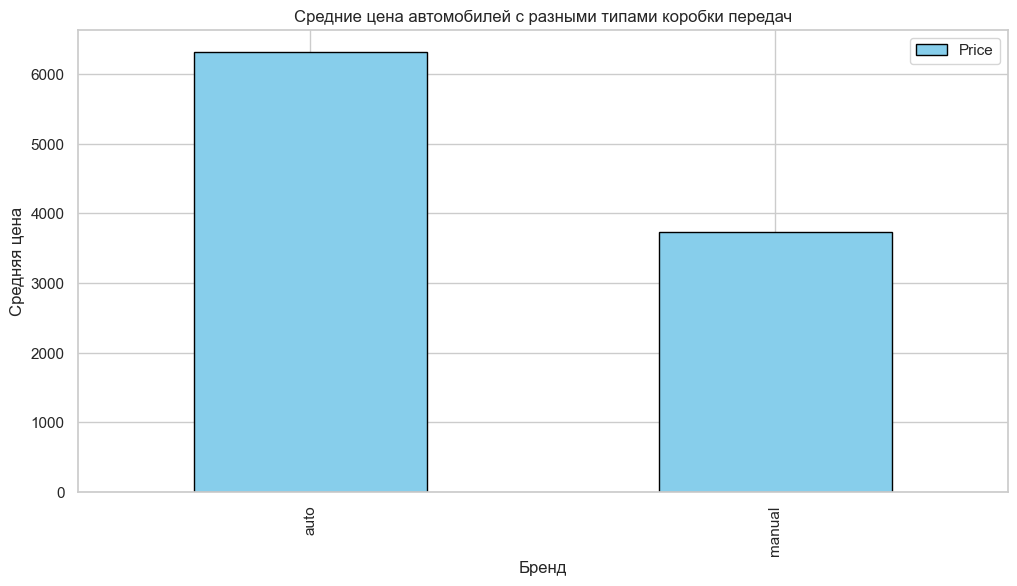

In [26]:
data.pivot_table(index=['Gearbox'], 
                 values=['Price'], 
                 aggfunc=np.mean)\
    .sort_values(by='Price',ascending=False)\
    .plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.title('Средние цена автомобилей c разными типами коробки передач')

Как правило дороже машины с автоматической коробкой передач, нежели автоматической

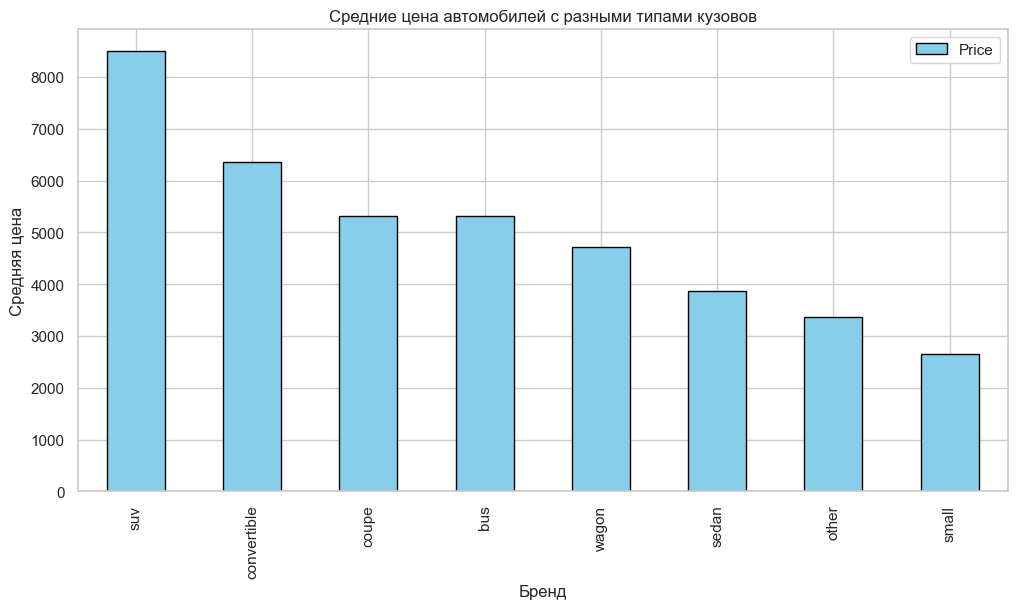

In [27]:
data.pivot_table(index=['VehicleType'], 
                 values=['Price'], 
                 aggfunc=np.mean)\
    .sort_values(by='Price',ascending=False)\
    .plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.title('Средние цена автомобилей c разными типами кузовов');

Типы кузова suv, convertiblr, coupe, bus в среднем дороже чем другие типы кузовов

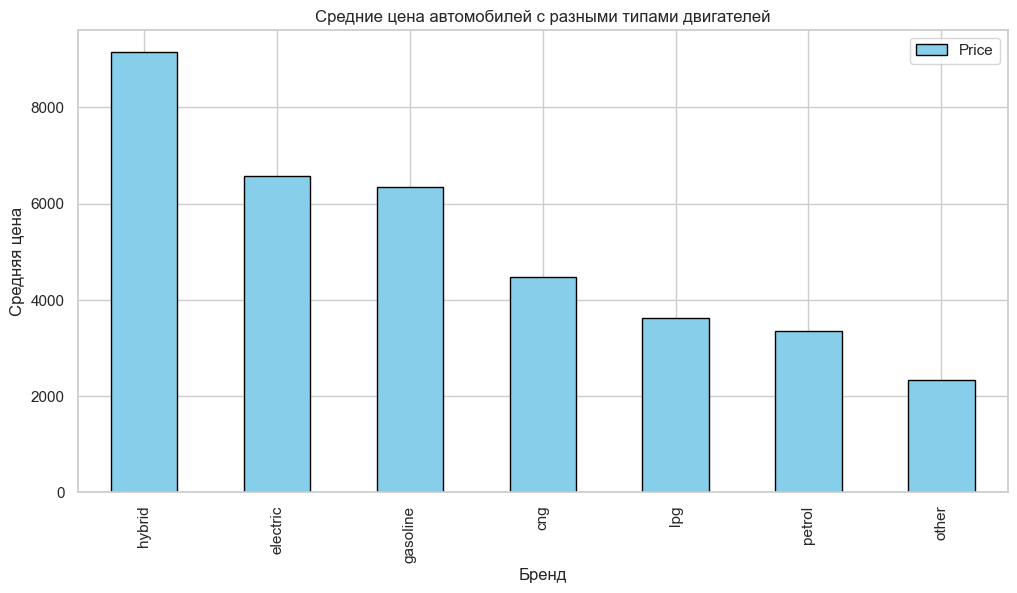

In [28]:
data.pivot_table(index=['FuelType'], 
                 values=['Price'], 
                 aggfunc=np.mean)\
    .sort_values(by='Price',ascending=False)\
    .plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.title('Средние цена автомобилей c разными типами двигателей');

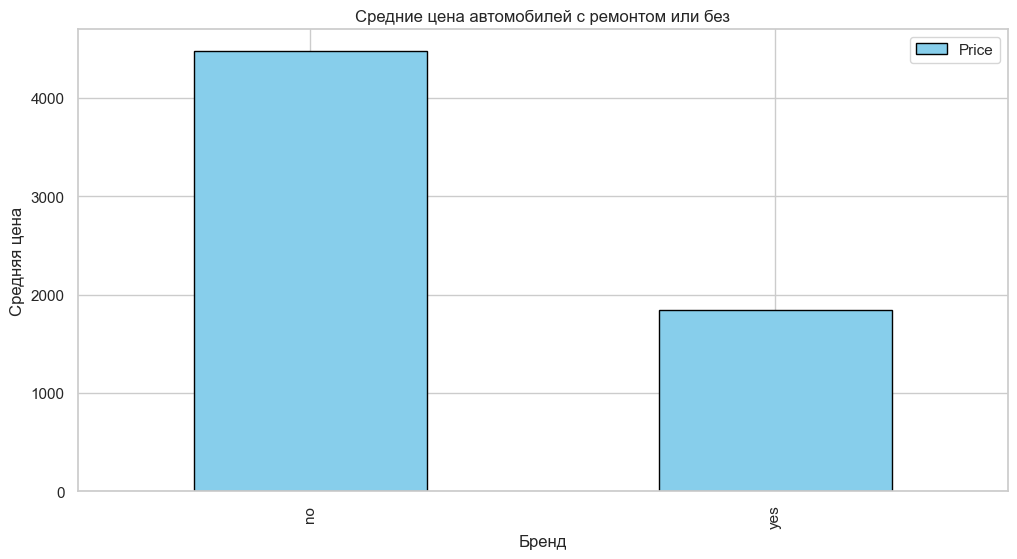

In [29]:
data.pivot_table(index=['Repaired'], 
                 values=['Price'], 
                 aggfunc=np.mean)\
    .sort_values(by='Price',ascending=False)\
    .plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.title('Средние цена автомобилей с ремонтом или без');

Машины, которые были в ремонте стоят сильно дешевле тех, которые не были в ремонте

<span style="color:black;font-weight:700;font-size:14px"> 
       Корреляцинная матрица
</span>

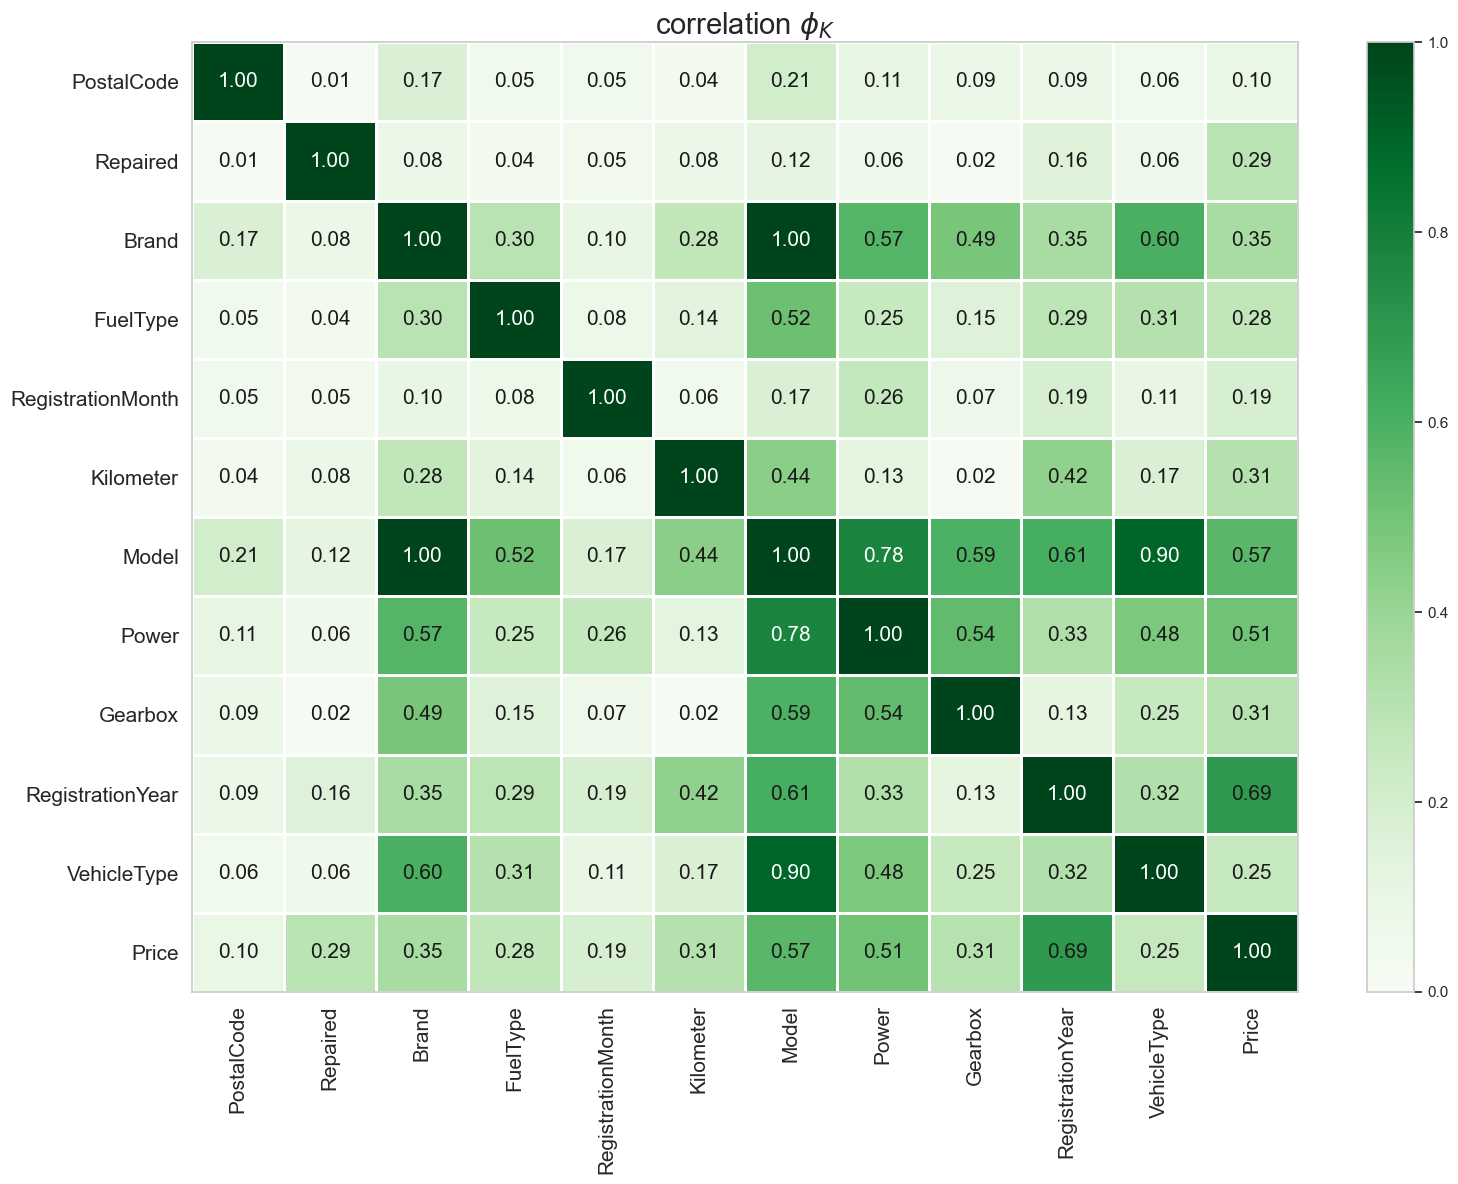

In [30]:
phik_correlation = phik_matrix(data, interval_cols=num_cols)
plot_correlation_matrix(phik_correlation.values,
                       x_labels=phik_correlation.columns,
                       y_labels=phik_correlation.index,
                       vmin=0, vmax=1, 
                       color_map='Greens', 
                       title=r'correlation $\phi_K$',
                       fontsize_factor=1.5,
                       figsize=(16,12))

Исходя из коррелированности признаков уберем, следующие признаки: PostalCode(почтовый индекс владельца анкеты (пользователя)) так как этот признак не несет для нас полезной информации о цене автомобиля, также удалим признак Model, так как мультиколлинеарен с признаком Brand, также этот признак будет проблематично закодировать, так как он имеет 250 уникальных значений. Также удалим признак RegistrationMonth.


In [31]:
data = data.drop(columns=['PostalCode', 'Model', 'RegistrationMonth'])

In [32]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Kilometer,FuelType,Brand,Repaired
0,480,sedan,1993,manual,0,150000,petrol,volkswagen,no
1,18300,coupe,2011,manual,190,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,125000,gasoline,jeep,no
3,1500,small,2001,manual,75,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,90000,gasoline,skoda,no


# Подготовка данных

На данном этапе подготовки реализуем пайплайн обработки данных, который будет включать в себя кодировку категориальных признаков и масштабирование числовых признаков

In [33]:
y = data['Price']
X = data.drop(columns=['Price'])

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=RANDOM_STATE)

In [34]:
X_train

,VehicleType,RegistrationYear,Gearbox,Power,Kilometer,FuelType,Brand,Repaired
212876,bus,2001,manual,0,150000,petrol,opel,no
272429,convertible,1992,manual,115,125000,petrol,bmw,no
314770,sedan,2008,manual,60,80000,petrol,volkswagen,no
256192,sedan,2018,manual,0,150000,petrol,audi,no
41303,sedan,2004,auto,177,150000,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...
125954,wagon,2001,auto,197,150000,gasoline,mercedes_benz,yes
272374,sedan,2003,manual,64,60000,gasoline,volkswagen,no
138646,small,1999,manual,45,150000,petrol,peugeot,no
154349,bus,2005,manual,101,150000,petrol,opel,no


In [35]:
num_columns = ['RegistrationYear', 'Power', 'Kilometer']
ohe_columns = ['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired']

ohe_pipeline = Pipeline(steps=[
    ('ohe_enocoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

num_pipeline = Pipeline(steps=[
    ('num_scaler', MinMaxScaler())
])

data_preprocessor = ColumnTransformer([
                                        ('ohe_pipeline', ohe_pipeline, ohe_columns),
                                        ('num_pipeline', num_pipeline, num_columns)
                                       ], remainder='passthrough'
                                    )

In [36]:
X_train_transform = data_preprocessor.fit_transform(X_train)
X_test_transform = data_preprocessor.transform(X_test)

In [60]:
models = {
    'LGBMRegressor': LGBMRegressor(boosting_type='gbdt', n_estimators=200, verbose=-100),
    'Catboost': CatBoostRegressor(random_state=RANDOM_STATE, verbose=False),
    'DecisionTree': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'LassoRegression': Lasso(alpha=0.1, random_state=RANDOM_STATE),
    'Stochastic Gradient Descent': SGDRegressor(random_state=RANDOM_STATE)
}


name_column = []
training_time_column = []

for name, model in models.items():
    model_list = []
    start_time = time.time()
    model.fit(X_train_transform,y_train)
    end_time = time.time()
    training_time = end_time - start_time
    name_column.append(name)
    training_time_column.append(training_time)
    print(f'Model {name} - training_time:{training_time}')
    
training_time_df = pd.DataFrame({'Модель': name_column,
                                 'Время обучения, сек': training_time_column}).set_index('Модель')


Model LGBMRegressor - training_time:3.6471426486968994
Model Catboost - training_time:59.62078309059143
Model DecisionTree - training_time:7.3172430992126465
Model LassoRegression - training_time:11.79974365234375
Model Stochastic Gradient Descent - training_time:7.3464720249176025


In [61]:
training_time_df

,"Время обучения, сек"
Модель,
LGBMRegressor,3.647143
Catboost,59.620783
DecisionTree,7.317243
LassoRegression,11.799744
Stochastic Gradient Descent,7.346472


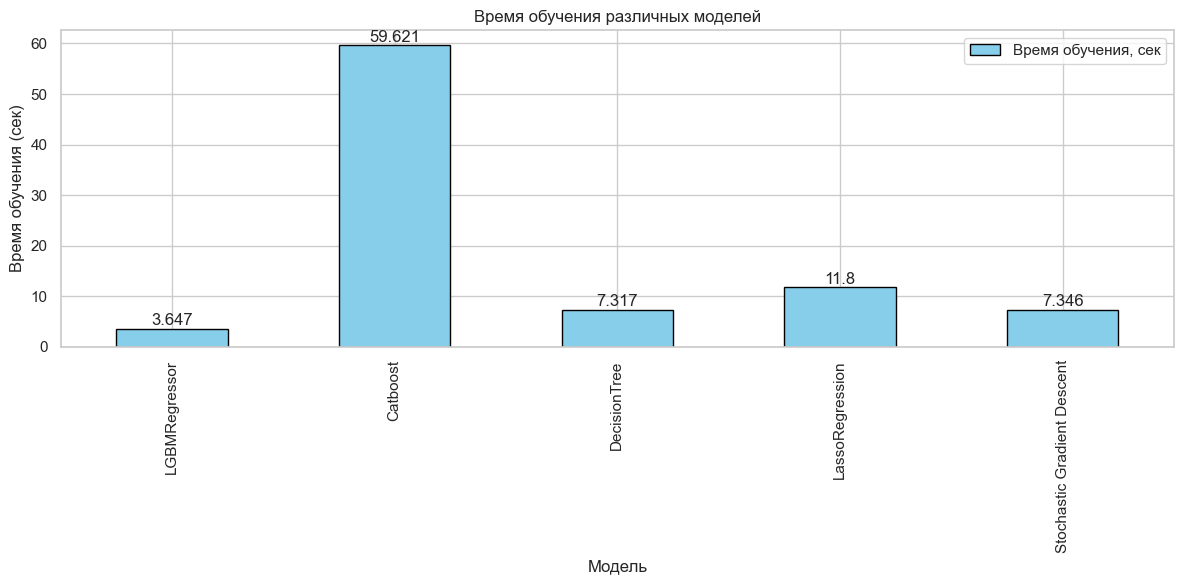

In [62]:
training_time_df.plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Модель')
plt.ylabel('Время обучения (сек)')
plt.title('Время обучения различных моделей')
plt.tight_layout() 

for i, value in enumerate(training_time_df.values):
    plt.text(i, value + 0.1, round(float(value),3), ha='center', va='bottom')

plt.show()

Как можно заметить быстрее всего обучается модель KNN, дольше всего LassoRegression

In [63]:
predicting_time_column = []
rmse_column = []

for name, model in models.items():
    start_time = time.time()
    predictions = model.predict(X_test_transform)
    end_time = time.time()
    predicting_time = end_time - start_time
    predicting_time_column.append(predicting_time)
    rmse = mean_squared_error(y_pred=predictions, y_true= y_test, squared=False)
    rmse_column.append(rmse)
    print(f'Model {name} - время предсказания - {predicting_time}')
    print(f'Model {name} - RMSE модели - {rmse}')    
    print()
    
predicting_time_df = pd.DataFrame({'Модель': name_column,
                                 'Время предсказания, сек': predicting_time_column}).set_index('Модель')

rmse_df = pd.DataFrame({'Модель': name_column,
                                 'RMSE': rmse_column}).set_index('Модель')


Model LGBMRegressor - время предсказания - 1.003113031387329
Model LGBMRegressor - RMSE модели - 1695.7460029998044

Model Catboost - время предсказания - 7.594047784805298
Model Catboost - RMSE модели - 1663.9625380538596

Model DecisionTree - время предсказания - 0.1762857437133789
Model DecisionTree - RMSE модели - 1920.5825920525651

Model LassoRegression - время предсказания - 0.021564006805419922
Model LassoRegression - RMSE модели - 2709.3575205959737

Model Stochastic Gradient Descent - время предсказания - 0.027981281280517578
Model Stochastic Gradient Descent - RMSE модели - 2710.6386100053946



In [64]:
predicting_time_df

,"Время предсказания, сек"
Модель,
LGBMRegressor,1.003113
Catboost,7.594048
DecisionTree,0.176286
LassoRegression,0.021564
Stochastic Gradient Descent,0.027981


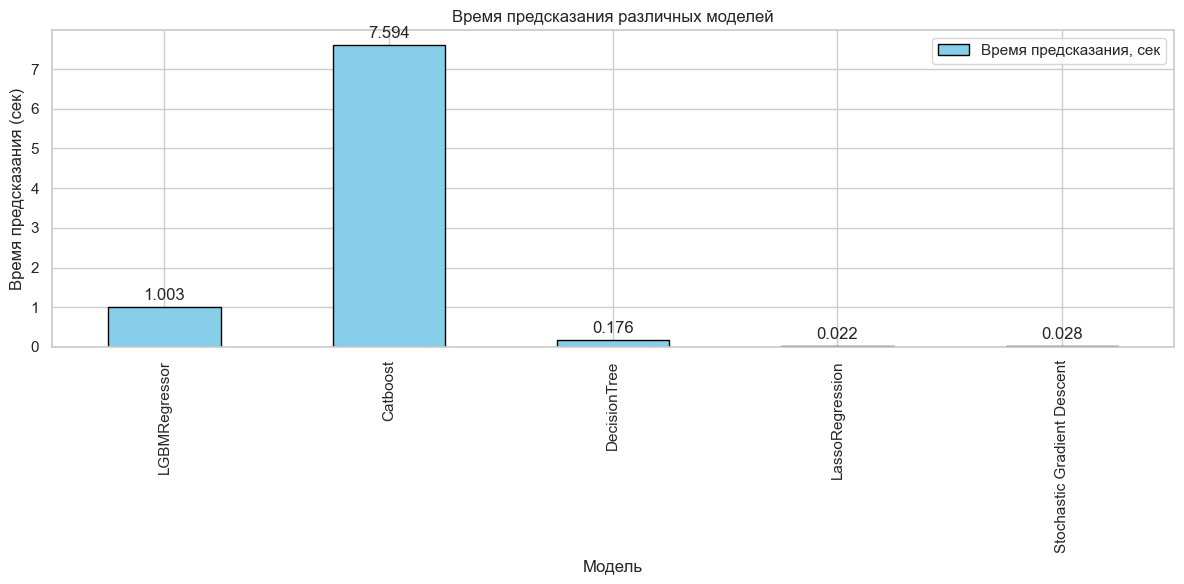

In [65]:
predicting_time_df.plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Модель')
plt.ylabel('Время предсказания (сек)')
plt.title('Время предсказания различных моделей')
plt.tight_layout() 

for i, value in enumerate(predicting_time_df.values):
    plt.text(i, value + 0.1, round(float(value),3), ha='center', va='bottom')

plt.show()

In [66]:
rmse_df

,RMSE
Модель,
LGBMRegressor,1695.746003
Catboost,1663.962538
DecisionTree,1920.582592
LassoRegression,2709.357521
Stochastic Gradient Descent,2710.638610


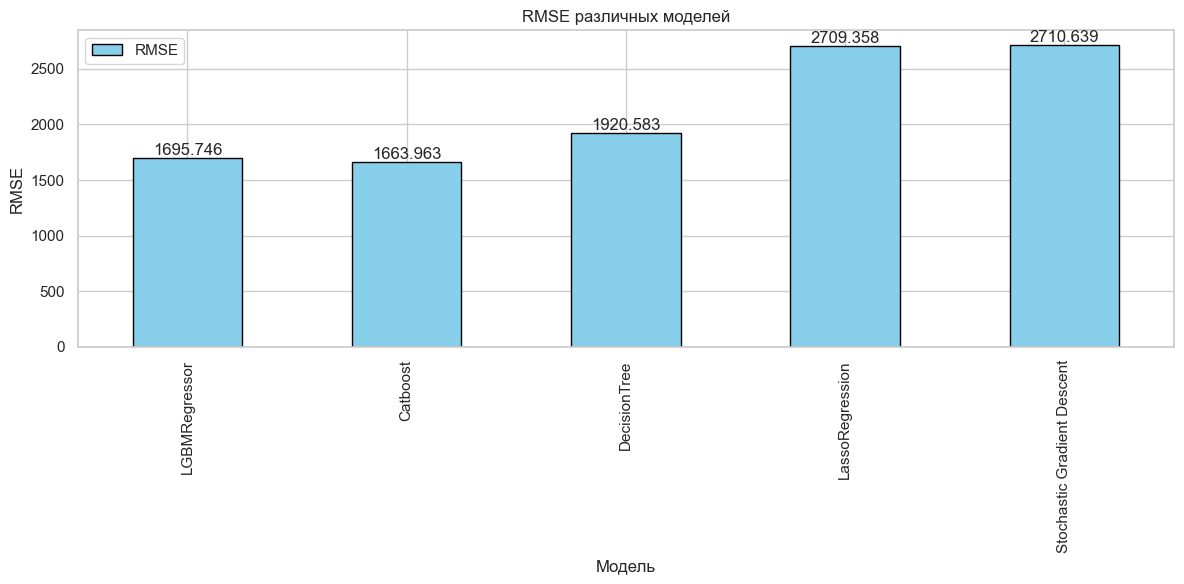

In [67]:
rmse_df.plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('RMSE различных моделей')
plt.tight_layout() 

for i, value in enumerate(rmse_df.values):
    plt.text(i, value + 0.1, round(float(value),3), ha='center', va='bottom')

plt.show()